In [ ]:
# prompt: link drive with this code
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import tensorflow as tf
import os
import cv2
import imghdr
from google.colab.patches import cv2_imshow

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

In [ ]:
data_dir = os.path.join('/content/gdrive/MyDrive','ImageClassification','data')
print(data_dir)
image_exts = ['jpeg','jpg','bmp','png']

/content/gdrive/MyDrive/ImageClassification/data


In [ ]:
print(os.listdir(data_dir))


['cricket', 'football']


In [ ]:
#Removing Dodgy images
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path = os.path.join(data_dir,image_class,image)
    if(image=='.ipynb_checkpoints'):
      os.removedirs(image_path)
      continue
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print("Image extenstion not supportable {}".format(image_path))
        os.remove(image_path)
    except Exception as e:
      print(e)
      print("Image not supportable {}".format(image_path))
      os.remove(image_path)

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 229 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()
batch

(array([[[[1.91601562e+00, 1.45083984e+02, 2.13000000e+02],
          [7.48046875e-01, 1.45244141e+02, 2.13000000e+02],
          [0.00000000e+00, 1.43000000e+02, 2.12580078e+02],
          ...,
          [3.51953125e+00, 1.46099609e+02, 2.22419922e+02],
          [2.51953125e-01, 1.44748047e+02, 2.22000000e+02],
          [0.00000000e+00, 1.44083984e+02, 2.24748047e+02]],
 
         [[2.88476562e+00, 1.46012054e+02, 2.14937500e+02],
          [1.71679688e+00, 1.45972595e+02, 2.14937500e+02],
          [5.61950684e-01, 1.44249725e+02, 2.14314178e+02],
          ...,
          [3.92633057e+00, 1.47756134e+02, 2.23592072e+02],
          [2.51953125e-01, 1.45838837e+02, 2.22968750e+02],
          [0.00000000e+00, 1.45496429e+02, 2.24829407e+02]],
 
         [[4.19726562e+00, 1.47152435e+02, 2.17703125e+02],
          [3.02929688e+00, 1.46993866e+02, 2.17738556e+02],
          [1.38235474e+00, 1.45779755e+02, 2.17062958e+02],
          ...,
          [4.39590454e+00, 1.50118561e+02, 2.2529

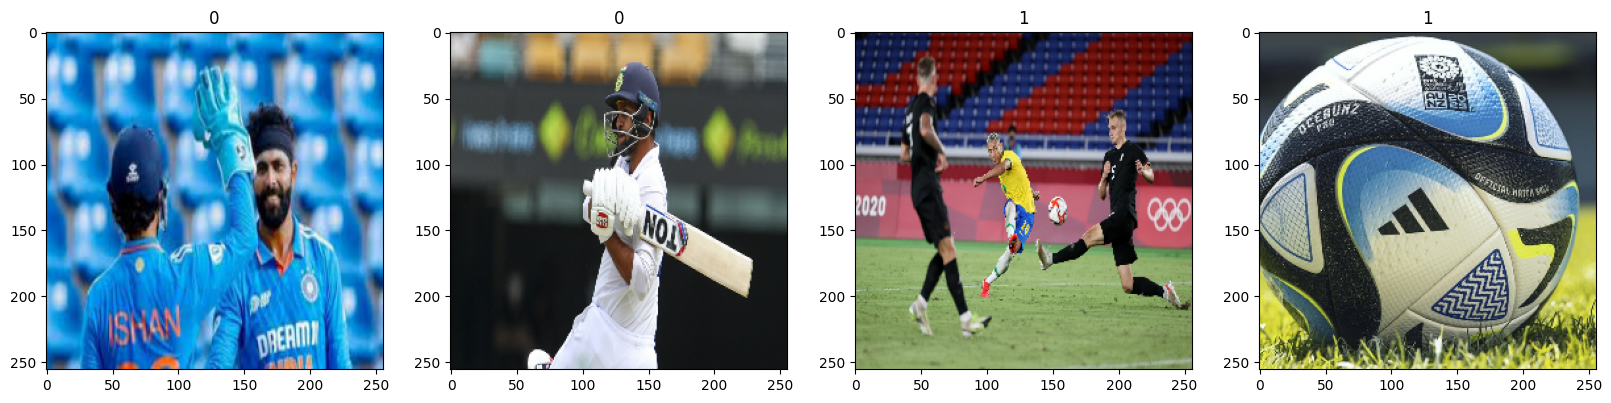

In [ ]:
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
#Pre-process data
data = data.map(lambda x,y:(x/255.0,y))

In [ ]:
batch = data.as_numpy_iterator().next()

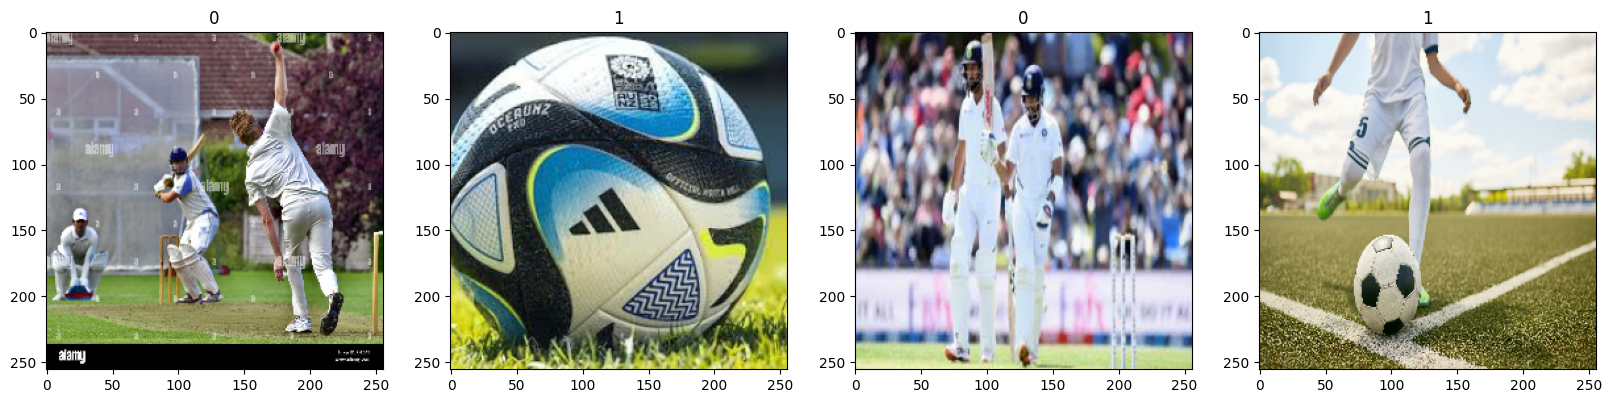

In [ ]:
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
len(data)

8

In [ ]:
#Splitting the data
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [ ]:
test_size
val_size

2

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
print(len(train),len(val),len(test))

5 2 1


In [ ]:
#model part-create a model to predict
#The real deep learning starts now hehe
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [ ]:
#model is done now let it learn things
logdir=os.path.join('/content/gdrive/MyDrive','ImageClassification','logs')
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train,epochs=20,validation_data = val,callbacks=[tensorboard_callback])

Epoch 1/20
5/5 [==============================] - 14s 704ms/step - loss: 0.7359 - accuracy: 0.5562 - val_loss: 0.6677 - val_accuracy: 0.5469
Epoch 2/20
5/5 [==============================] - 7s 956ms/step - loss: 0.6578 - accuracy: 0.5688 - val_loss: 0.6021 - val_accuracy: 0.6875
Epoch 3/20
5/5 [==============================] - 5s 663ms/step - loss: 0.5957 - accuracy: 0.7125 - val_loss: 0.5167 - val_accuracy: 0.7656
Epoch 4/20
5/5 [==============================] - 5s 760ms/step - loss: 0.4954 - accuracy: 0.7812 - val_loss: 0.4998 - val_accuracy: 0.7188
Epoch 5/20
5/5 [==============================] - 5s 693ms/step - loss: 0.4106 - accuracy: 0.8375 - val_loss: 0.3276 - val_accuracy: 0.8594
Epoch 6/20
5/5 [==============================] - 8s 1s/step - loss: 0.3265 - accuracy: 0.9000 - val_loss: 0.2853 - val_accuracy: 0.9531
Epoch 7/20
5/5 [==============================] - 5s 684ms/step - loss: 0.2413 - accuracy: 0.9000 - val_loss: 0.1736 - val_accuracy: 0.9375
Epoch 8/20
5/5 [======

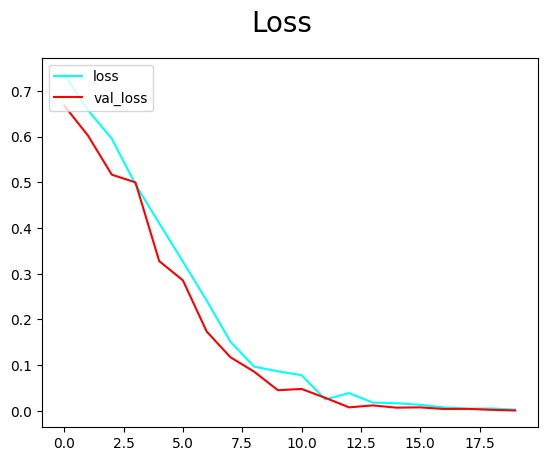

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='cyan',label='loss')
plt.plot(hist.history['val_loss'],color='red',label='val_loss')
plt.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

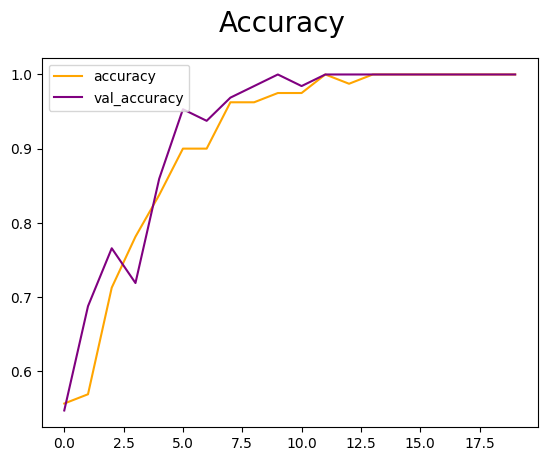

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='orange',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='purple',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
#Evaluating performacnce
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [ ]:
pre = Precision()
re=Recall()
acc=BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)

1/1 [==============================] - 0s 321ms/step


In [ ]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


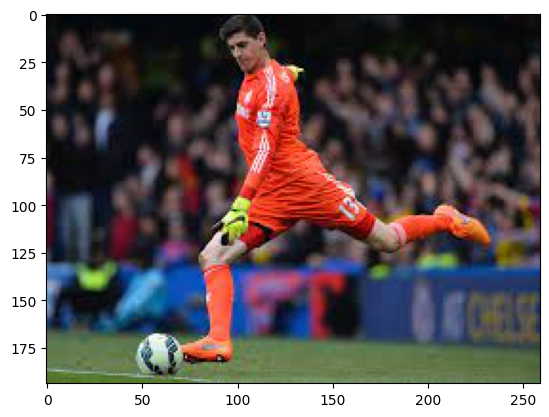

In [ ]:
#Testing the data
img = cv2.imread(os.path.join('/content/gdrive/MyDrive/ImageClassification','testFootball.jpg'))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

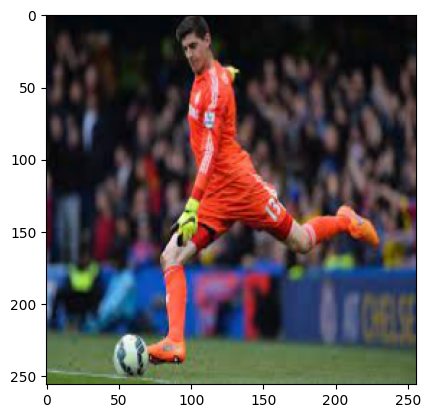

In [ ]:
resize = tf.image.resize(cv2.cvtColor(img,cv2.COLOR_BGR2RGB),(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255,0))
yhat

1/1 [==============================] - 0s 18ms/step


array([[0.8530692]], dtype=float32)

In [ ]:
if(yhat<=0.5):
  print("The image is showing cricket")
else:
  print("The image is showing football")

The image is showing football


In [ ]:
#Finally let's just ctrl+S the model
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('/content/gdrive/MyDrive/ImageClassification/','models','crecfootballmodel.h5'))


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
newModel = load_model(os.path.join('/content/gdrive/MyDrive/ImageClassification/','models','crecfootballmodel.h5'))

In [ ]:
yhatnew = newModel.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 81ms/step


In [ ]:
if yhatnew < 0.5:
  print("it is cricket")
else:
  print("it is football")

it is football
